In [2]:
!python --version

Python 3.11.0


# Useful Links

+ Plotting: https://python-graph-gallery.com/
+ Deep Learning resources: https://www.kaggle.com/models?query=&task=&lang=&id=&datatype=&framework=&license=&size=&fine-tunable=&minUsabilityRating=&publisher=
+ DataCamp Career Tracks: e.g. https://www.datacamp.com/tracks/data-analyst-with-python
+ State of the art ML: https://paperswithcode.com/sota
+ Coding projects ideas: https://www.dataquest.io/blog/python-projects-for-beginners/

# Data Manipulation with Python

Data manipulation (or Data Wrangling) involves all the previous steps before training a model. 

Real-world data has NAs, unnecessary columns or rows or even in formats that are not directly feedable to a machine learning model or graphing program.

To make the data available to those models we do Data Wrangling.

The most common library to do that is _pandas_.

In [3]:
#!pip install pandas matplotlib seaborn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Pandas Recap

Yesterday's class showed you how to create/load a dataframe, modify elements, functions such as _head_, _info_, _shape_, _describe_, etc.

Let's refresh it.

In [4]:


def os_path(name_dataset):
    """This is a docstring

    You can document the functions you write and hope that other people 
    do the same.
    In VSCode, there is a plugin that automatically creates this 
    from the fields present in the function

    Args:
        name_dataset (_type_): _description_

    Returns:
        _type_: returns a parsed path string 
    """
    # windows and linux (or osx) have different ways to handle paths
    import platform
    if platform.system() == "Windows":
        # The backlash symbol \ has a special function in Python (programming in general).
        # To write it so that the Python interpreter doesn't apply its function you have to use an extra \
        path = "datasets\\" + name_dataset 
    else:
        path = "./datasets/" + name_dataset
    
    return path


### Loading data

In [5]:
name_dataset = "olive_original.csv"

olive = pd.read_csv(os_path(name_dataset))

olive

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,Southern Italy,North-Apulia,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,Southern Italy,North-Apulia,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,Southern Italy,North-Apulia,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,Southern Italy,North-Apulia,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,Southern Italy,North-Apulia,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
...,...,...,...,...,...,...,...,...,...,...
567,Northern Italy,West-Liguria,12.80,1.10,2.90,74.90,7.90,0.10,0.10,0.02
568,Northern Italy,West-Liguria,10.60,1.00,2.70,77.40,8.10,0.10,0.10,0.03
569,Northern Italy,West-Liguria,10.10,0.90,2.10,77.20,9.70,0.00,0.00,0.02
570,Northern Italy,West-Liguria,9.90,1.20,2.50,77.50,8.70,0.10,0.10,0.02


### Pandas Dataframe methods

In [6]:
# head returns the first N rows of the dataframe (by default N=5)
# top 10 of highest oleic fatty acid concentration
olive.sort_values(by="oleic", ascending=False).head(10)

# now do the last 10 by oleic concentration 

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
521,Northern Italy,East-Liguria,6.10,0.80,2.30,84.10,6.50,0.00,0.20,0.03
2,Southern Italy,North-Apulia,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
13,Southern Italy,North-Apulia,8.75,0.52,2.43,80.18,6.55,0.41,0.79,0.32
458,Northern Italy,Umbria,11.05,0.15,1.98,80.05,5.75,0.52,0.20,0.02
462,Northern Italy,Umbria,11.05,0.30,1.98,79.95,5.70,0.52,0.20,0.03
455,Northern Italy,Umbria,10.50,0.78,1.88,79.90,6.08,0.28,0.23,0.03
453,Northern Italy,Umbria,10.50,0.78,1.75,79.90,6.10,0.18,0.59,0.03
478,Northern Italy,East-Liguria,11.40,0.50,2.00,79.90,5.80,0.10,0.20,0.01
464,Northern Italy,Umbria,11.10,0.15,2.10,79.90,5.70,0.50,0.20,0.02
6,Southern Italy,North-Apulia,9.22,0.66,2.64,79.90,6.18,0.49,0.56,0.29


In [7]:
# .info() gives you basic information about the dataset, column datatypes, nans, and memory usage
olive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       572 non-null    object 
 1   area         572 non-null    object 
 2   palmitic     572 non-null    float64
 3   palmitoleic  572 non-null    float64
 4   stearic      572 non-null    float64
 5   oleic        572 non-null    float64
 6   linoleic     572 non-null    float64
 7   linolenic    572 non-null    float64
 8   arachidic    572 non-null    float64
 9   eicosenoic   572 non-null    float64
dtypes: float64(8), object(2)
memory usage: 44.8+ KB


In [8]:
# .shape returns a tuple of values (number of rows, number of columns)
olive.shape

(572, 10)

In [9]:
# .columns returns an iterable of the column names
olive.columns


Index(['region', 'area', 'palmitic', 'palmitoleic', 'stearic', 'oleic',
       'linoleic', 'linolenic', 'arachidic', 'eicosenoic'],
      dtype='object')

In [10]:
# .index returns an object that contains the indexes of the dataset
olive.index

RangeIndex(start=0, stop=572, step=1)

In [11]:
# .dtypes returns the data type of each column
olive.dtypes == "float64"

region         False
area           False
palmitic        True
palmitoleic     True
stearic         True
oleic           True
linoleic        True
linolenic       True
arachidic       True
eicosenoic      True
dtype: bool

In [12]:
# .describe() returns basic statistical information; like R summary()
olive.describe()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,12.317413,1.260944,2.288654,73.117483,9.805280,0.318881,0.580979,0.162815
std,1.685923,0.524944,0.367449,4.058102,2.427992,0.129687,0.220302,0.140833
min,6.100000,0.150000,1.520000,63.000000,4.480000,0.000000,0.000000,0.010000
25%,10.950000,0.877500,2.050000,70.000000,7.707500,0.260000,0.500000,0.020000
50%,12.010000,1.100000,2.230000,73.025000,10.300000,0.330000,0.610000,0.170000
75%,13.600000,1.692500,2.490000,76.800000,11.807500,0.402500,0.700000,0.280000
max,17.530000,2.800000,3.750000,84.100000,14.700000,0.740000,1.050000,0.580000


#### Pandas methods mini exercise

There are a too many methods to review them, look a method to: subset the dataframe and keep only the numeric columns

In [13]:
olive.select_dtypes(include="number")

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
...,...,...,...,...,...,...,...,...
567,12.80,1.10,2.90,74.90,7.90,0.10,0.10,0.02
568,10.60,1.00,2.70,77.40,8.10,0.10,0.10,0.03
569,10.10,0.90,2.10,77.20,9.70,0.00,0.00,0.02
570,9.90,1.20,2.50,77.50,8.70,0.10,0.10,0.02


### Slicing a dataframe

In [14]:
# dataframes are iterables of columns: the same as a dictionary (in fact you can create a dataframe directly from a dictionary)
# to select a column by name you can use
olive["oleic"].shape # returns a Series
# or
olive.oleic#.shape

0      78.23
1      77.09
2      81.13
3      79.52
4      77.71
       ...  
567    74.90
568    77.40
569    77.20
570    77.50
571    79.50
Name: oleic, Length: 572, dtype: float64

In [15]:
# other ways are
olive.loc[:,"oleic"]
# if you want several columns or rows
olive.iloc[:3,:3]
olive.loc[:3, :"palmitic"] #FROM THE DOCS: Note that contrary to usual python slices, both the start and the stop are included

,region,area,palmitic
0,Southern Italy,North-Apulia,10.75
1,Southern Italy,North-Apulia,10.88
2,Southern Italy,North-Apulia,9.11
3,Southern Italy,North-Apulia,9.66


#### Slicing mini-exercise

Get the last 3 rows and 3 columns of the dataframe

In [16]:
olive.iloc[-3:,-3:]

,linolenic,arachidic,eicosenoic
569,0.0,0.0,0.02
570,0.1,0.1,0.02
571,0.1,0.2,0.02


## Duplicates and NAs

I downloaded a dataset from Kaggle to apply the functions related to duplicates and NAs.

https://www.kaggle.com/code/sabrinamacaluso/data-cleaning-missing-and-duplicated-values/input

it is located in the __datasets__ folder.

In [17]:
name_dataset_dirty = "hotel_bookings.csv"

hotel_bookings = pd.read_csv(os_path(name_dataset_dirty))

print(f"The dataset {name_dataset_dirty} has shape: {hotel_bookings.shape}")
hotel_bookings.head()


The dataset hotel_bookings.csv has shape: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Lets check if there are NAs (or directly get the number of NAs) using __.isna()__

In [18]:
hotel_bookings
# isna() will ask every cell of the dataframe if its NA or not
hotel_bookings.isna()
# sum() (and other functions like this usually apply on column level) sums the values of each colum
hotel_bookings.isna().sum()
# sort_values orders them 
hotel_bookings.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

In [19]:
# we can set a threshold for the NAs: we will drop any column that have Threshold or more of missing values or just drop any column with NAs (be careful, check if they are relevant for the problem at hand)
n_observations = hotel_bookings.shape[0]
# threshold = 0.5*n_observations
# print(f"NA threshold set at {threshold}")
hotel_bookings_nona = hotel_bookings.dropna(axis=1)
hotel_bookings_nona.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

In [20]:
hotel_bookings_nona.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Filling in missing values

Sometimes a column is necessary for a problem (e.g. glucose levels for predicting diabetes), and maybe we can't allow ourselves from dropping a row (because of lack of data). Then Filling missing data is the way to go:
There are several ways:

+ Filling by value: a constant value. Check the distribution of the variable, maybe the mean is a good option or not (see Skewed distributions like Salaries)
+ Filling with the prior/next value.
+ Interpolation

In [21]:
data = {"np": [1.0, np.nan, np.nan, 2], "arrow": pd.array([1.0, pd.NA, pd.NA, 2])}

df = pd.DataFrame(data)
df

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


In [22]:
df.fillna(0)

,np,arrow
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,2.0,2.0


In [23]:
df.fillna(df.mean())

,np,arrow
0,1.0,1.0
1,1.5,1.5
2,1.5,1.5
3,2.0,2.0


In [24]:
df.ffill()

,np,arrow
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0


In [25]:
df.bfill()

,np,arrow
0,1.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0


In [26]:
df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [27]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


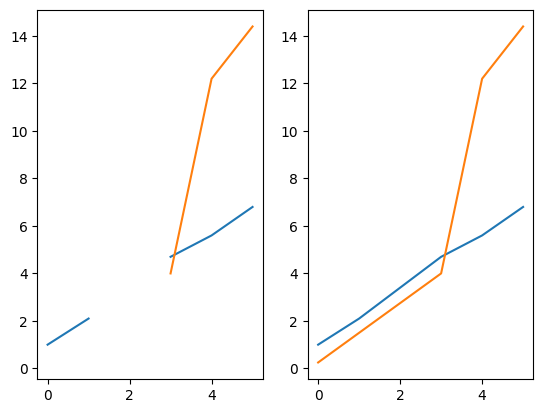

In [28]:
fig, axes = plt.subplots(1,2)
axes[0].plot(df)
axes[1].plot(df.interpolate())
plt.show()


Now let's check for duplicates. To see better what it does let's look at the example from Pandas docs.

In [29]:
df = pd.DataFrame({
'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
'rating': [4, 4, 3.5, 15, 5]
})
df


,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


#### Drop Duplicates mini-exercise

Play with the parameters of duplicated

In [30]:
df.duplicated() # subset=None, keep="first"; keep is the parameter that tells Pandas which row is the original (to keep) and which are the duplicates (to be dropped)


0    False
1     True
2    False
3    False
4    False
dtype: bool

## Long and Wide dataframes

Let's see first an example of a wide dataframe.



In [31]:
# name_dataset_wide = "WineQT.csv"

# wide_df = pd.read_csv(os_path(name_dataset_wide))

# print(f"The dataset {name_dataset_dirty} has shape: {wide_df.shape}")
# wide_df.head()
olive

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,Southern Italy,North-Apulia,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,Southern Italy,North-Apulia,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,Southern Italy,North-Apulia,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,Southern Italy,North-Apulia,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,Southern Italy,North-Apulia,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
...,...,...,...,...,...,...,...,...,...,...
567,Northern Italy,West-Liguria,12.80,1.10,2.90,74.90,7.90,0.10,0.10,0.02
568,Northern Italy,West-Liguria,10.60,1.00,2.70,77.40,8.10,0.10,0.10,0.03
569,Northern Italy,West-Liguria,10.10,0.90,2.10,77.20,9.70,0.00,0.00,0.02
570,Northern Italy,West-Liguria,9.90,1.20,2.50,77.50,8.70,0.10,0.10,0.02


Wide datasets are better to store information that's why you will most likely see dataframes in this format. But long datasets are very useful for some functions like plotting libraries or Exploratory Data Analysis.

Let's use the olive datasets as an example: 

    + Each row represents an observation (an olive oil sample that has been analyzed)
    + Each column represents a variable

Now, what is a long dataframe. In a long dataframe each observation no longer has only one row. Let's see an example.
https://pandas.pydata.org/docs/user_guide/reshaping.html


In [32]:
olive.select_dtypes(include="object").columns

Index(['region', 'area'], dtype='object')

In [33]:
572*8

4576

In [34]:
olive_long = pd.melt(
    olive,
    id_vars = olive.select_dtypes(include="object").columns, # keeps these columns fixed 
    var_name = "fatty_acid", # new column in long dataframe with the name of the type of fatty acid
    value_name = "concentration" # new column in long dataframe with the value of the concentration
)
olive_long

,region,area,fatty_acid,concentration
0,Southern Italy,North-Apulia,palmitic,10.75
1,Southern Italy,North-Apulia,palmitic,10.88
2,Southern Italy,North-Apulia,palmitic,9.11
3,Southern Italy,North-Apulia,palmitic,9.66
4,Southern Italy,North-Apulia,palmitic,10.51
...,...,...,...,...
4571,Northern Italy,West-Liguria,eicosenoic,0.02
4572,Northern Italy,West-Liguria,eicosenoic,0.03
4573,Northern Italy,West-Liguria,eicosenoic,0.02
4574,Northern Italy,West-Liguria,eicosenoic,0.02


You can see that in the long dataframe, each row from the original one has branched into 8 (number of fatty acid columns) different ones.

When you want to for example: "I want to plot the distribution (percentiles) of the fatty acid 'oleic' grouped by region to see if there is any difference between regions/areas etc."

This is easier done in long format dataframes

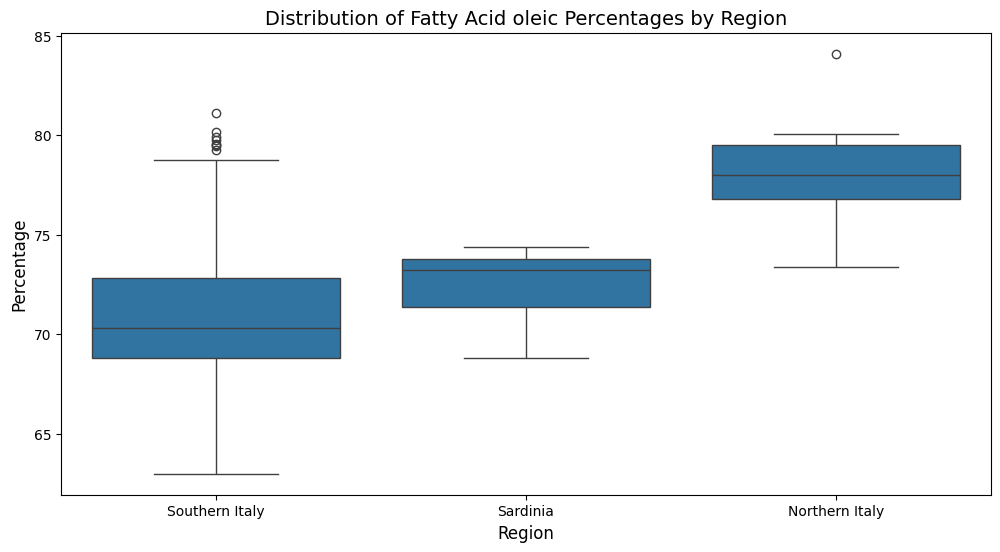

In [35]:
# Create a boxplot
fatty_acid = "oleic"
plt.figure(figsize=(12, 6))
sns.boxplot(x="region", y="concentration", data=olive_long[olive_long.fatty_acid==fatty_acid])

# Add title and labels
plt.title(f"Distribution of Fatty Acid {fatty_acid} Percentages by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

# Show the plot
plt.show()

## Aggregation: Groupby and functions

Aggregation functions are the ones that reduce the dimension of the dataframe.

e.g.: mean, sum, size, min, max, etc.

These operations tend to be easier to do in long format dataframes.


In [36]:
olive_long.groupby(["region", "fatty_acid"])["concentration"].describe()

count       mean       std    min      25%  \
region         fatty_acid                                                
Northern Italy arachidic    151.0   0.375762  0.293586   0.00   0.1000   
               eicosenoic   151.0   0.019735  0.007298   0.01   0.0100   
               linoleic     151.0   7.270331  1.431226   5.10   6.0200   
               linolenic    151.0   0.217881  0.168865   0.00   0.1000   
               oleic        151.0  77.930530  1.648155  73.40  76.8000   
               palmitic     151.0  10.948013  0.825635   6.10  10.6000   
               palmitoleic  151.0   0.837351  0.264388   0.15   0.6900   
               stearic      151.0   2.308013  0.389560   1.70   2.0000   
Sardinia       arachidic     98.0   0.731735  0.118826   0.45   0.6600   
               eicosenoic    98.0   0.019388  0.007436   0.01   0.0100   
               linoleic      98.0  11.965306  1.072336  10.57  11.1225   
               linolenic     98.0   0.270918  0.053844   0.15   0.2300   
               oleic         98.0  72.680204  1.418783  68.82  71.3725   
               palmitic      98.0  11.113469  0.404111  10.30  10.8525   
               palmitoleic   98.0   0.967449  0.138514   0.35   0.8825   
               stearic       98.0   2.261837  0.176363   1.99   2.1200   
Southern Italy arachidic    323.0   0.631176  0.111644   0.32   0.5600   
               eicosenoic   323.0   0.273220  0.083915   0.10   0.2200   
               linoleic     323.0  10.334985  2.106730   4.48   8.5550   
               linolenic    323.0   0.380650  0.079727   0.20   0.3200   
               oleic        323.0  71.000093  3.451431  63.00  68.8300   
               palmitic     323.0  13.322879  1.529349   8.75  12.6800   
               palmitoleic  323.0   1.548019  0.507237   0.35   1.2150   
               stearic      323.0   2.287740  0.398709   1.52   2.0150   

                               50%      75%    max  
region         fatty_acid                           
Northern Italy arachidic     0.380   0.5950   1.00  
               eicosenoic    0.020   0.0250   0.03  
               linoleic      6.800   8.2500  10.50  
               linolenic     0.200   0.3500   0.70  
               oleic        78.000  79.5000  84.10  
               palmitic     10.900  11.2500  14.00  
               palmitoleic   0.800   1.0000   1.80  
               stearic       2.300   2.5000   3.50  
Sardinia       arachidic     0.720   0.8100   1.05  
               eicosenoic    0.020   0.0200   0.03  
               linoleic     11.465  13.0650  14.70  
               linolenic     0.270   0.3000   0.43  
               oleic        73.255  73.8100  74.39  
               palmitic     11.075  11.3725  12.13  
               palmitoleic   0.960   1.0400   1.35  
               stearic       2.220   2.3950   2.72  
Southern Italy arachidic     0.620   0.6900   1.02  
               eicosenoic    0.270   0.3200   0.58  
               linoleic     10.900  12.0250  14.62  
               linolenic     0.370   0.4400   0.74  
               oleic        70.300  72.8350  81.13  
               palmitic     13.460  14.1900  17.53  
               palmitoleic   1.630   1.8500   2.80  
               stearic       2.230   2.4950   3.75

Compare the next two lines of code; they output the same result but thanks to the previous step of turning the wide dataframe into a long one we can do the aggregation function without a hassle.

In [39]:
# you can also get the mean of each fatty_acid by region and turn it back into a wide dataframe directly
olive_long.pivot_table(index="region", columns="fatty_acid", values="concentration", aggfunc="mean")

fatty_acid,arachidic,eicosenoic,linoleic,linolenic,oleic,palmitic,palmitoleic,stearic
region,,,,,,,,
Northern Italy,0.375762,0.019735,7.270331,0.217881,77.930530,10.948013,0.837351,2.308013
Sardinia,0.731735,0.019388,11.965306,0.270918,72.680204,11.113469,0.967449,2.261837
Southern Italy,0.631176,0.273220,10.334985,0.380650,71.000093,13.322879,1.548019,2.287740


In [46]:

olive.loc[:,['region', 'palmitic', 'palmitoleic', 'stearic', 'oleic',
       'linoleic', 'linolenic', 'arachidic', 'eicosenoic']].groupby(["region"]).agg("mean") # the columns are in the original order

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
Northern Italy,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735
Sardinia,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
Southern Italy,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220


/home/dova/Desktop/AI_course/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


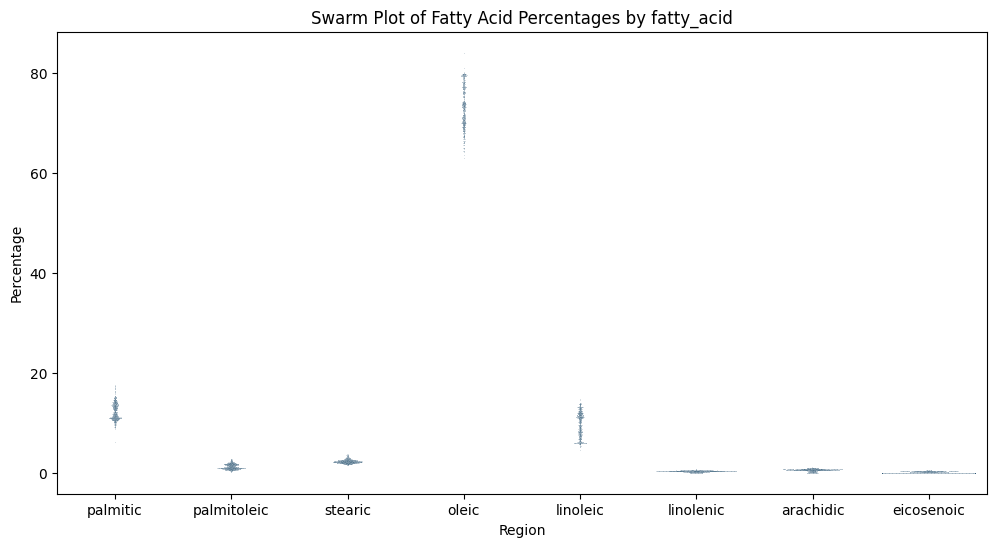

In [52]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x="fatty_acid", y="concentration", data=olive_long, alpha=0.7, size=0.3)
plt.title("Swarm Plot of Fatty Acid Percentages by fatty_acid")
plt.xlabel("Region")
plt.ylabel("Percentage")
plt.show()


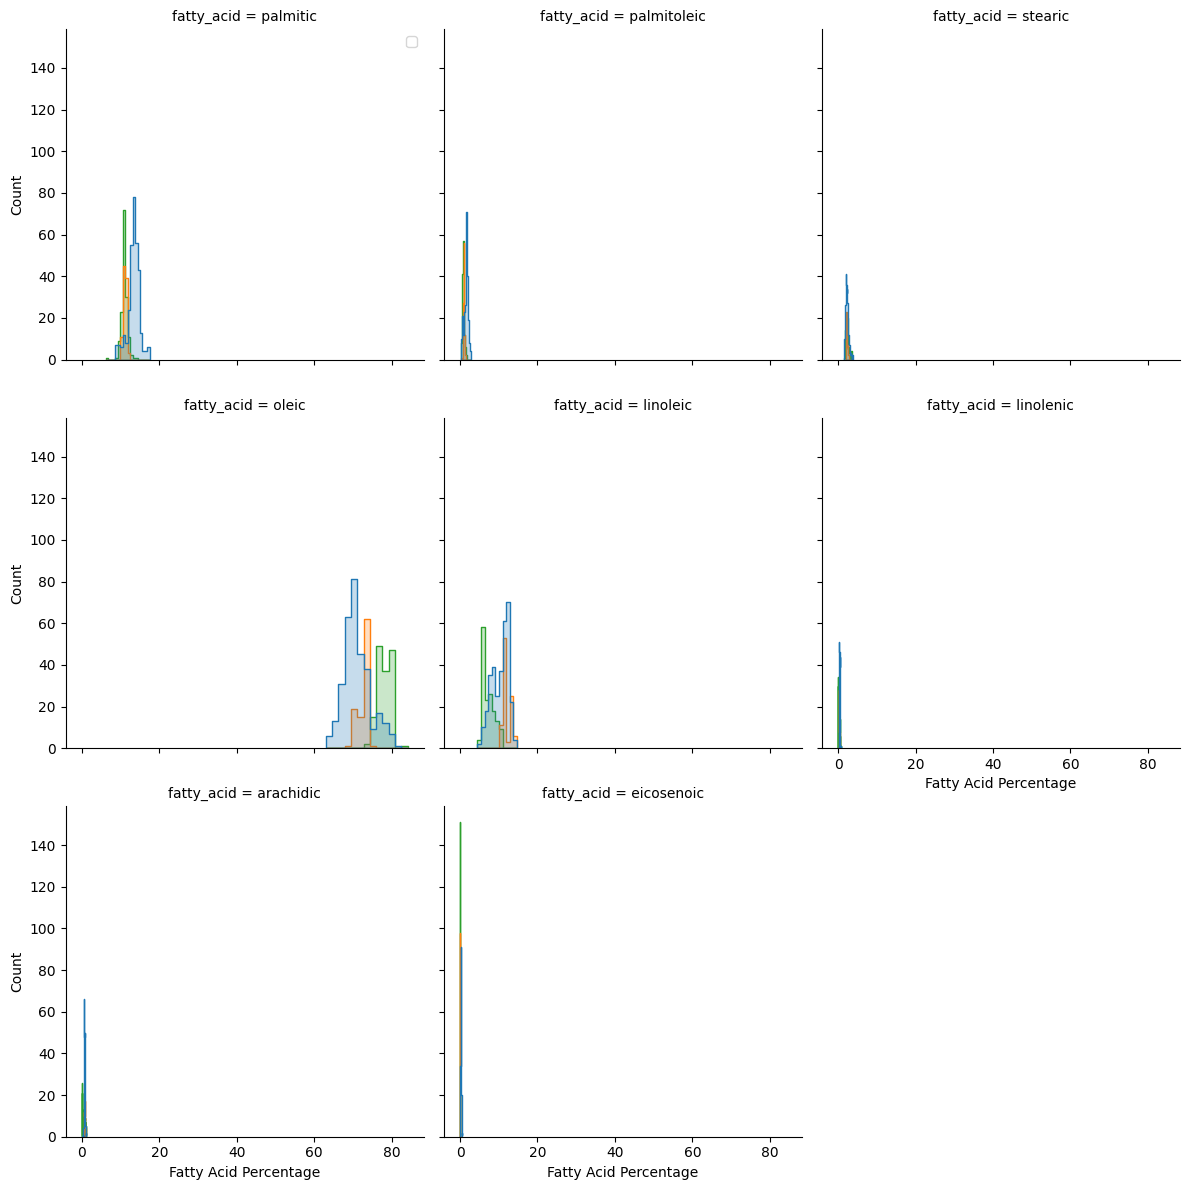

In [70]:
# Create a FacetGrid with one subplot per Region
g = sns.FacetGrid(olive_long, col="fatty_acid", col_wrap=3, height=4,sharex=True, sharey=True, legend_out=False)

# Map a histogram to each subplot, grouping by Fatty Acid with different colors
g.map_dataframe(sns.histplot, x="concentration", hue="region", element="step", common_norm=False)

# Add title and legend
g.set_axis_labels("Fatty Acid Percentage", "Count")
g.add_legend(title="Fatty Acid")
# Add the legend
g.add_legend()
plt.tight_layout()
plt.show()

## Filters, selecting by condition, order

In [79]:
olive[olive.oleic > 80] # one condition over a colum 
olive.loc[olive.oleic > 80]

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
2,Southern Italy,North-Apulia,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
13,Southern Italy,North-Apulia,8.75,0.52,2.43,80.18,6.55,0.41,0.79,0.32
458,Northern Italy,Umbria,11.05,0.15,1.98,80.05,5.75,0.52,0.20,0.02
521,Northern Italy,East-Liguria,6.10,0.80,2.30,84.10,6.50,0.00,0.20,0.03


In [77]:
olive[(olive.oleic > 80) & (olive.region == "Northern Italy")]

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
458,Northern Italy,Umbria,11.05,0.15,1.98,80.05,5.75,0.52,0.2,0.02
521,Northern Italy,East-Liguria,6.10,0.80,2.30,84.10,6.50,0.00,0.2,0.03


In [78]:
# usign query
olive.query("oleic > 80 & region == 'Northern Italy' ")

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
458,Northern Italy,Umbria,11.05,0.15,1.98,80.05,5.75,0.52,0.2,0.02
521,Northern Italy,East-Liguria,6.10,0.80,2.30,84.10,6.50,0.00,0.2,0.03


In [80]:
# selecting by elements in a list e.g.
olive.loc[olive.area.isin(["Umbria", "East-Liguria"])]

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
421,Northern Italy,Umbria,10.85,0.70,1.80,79.55,6.05,0.20,0.50,0.01
422,Northern Italy,Umbria,10.85,0.70,1.85,79.55,6.00,0.25,0.55,0.01
423,Northern Italy,Umbria,10.90,0.60,1.90,79.50,6.00,0.28,0.47,0.02
424,Northern Italy,Umbria,10.80,0.65,1.89,79.60,6.02,0.35,0.20,0.01
425,Northern Italy,Umbria,10.90,0.60,1.95,79.55,6.00,0.28,0.42,0.02
...,...,...,...,...,...,...,...,...,...,...
517,Northern Italy,East-Liguria,11.10,0.70,2.40,78.20,6.70,0.20,0.70,0.03
518,Northern Italy,East-Liguria,11.50,0.70,2.20,78.50,6.20,0.20,0.40,0.02
519,Northern Italy,East-Liguria,11.80,0.80,2.40,77.60,6.70,0.20,0.50,0.02
520,Northern Italy,East-Liguria,10.20,0.80,2.50,79.20,6.80,0.10,0.30,0.03


In [81]:
# NOT: negation of a condition
olive.loc[~(olive.area.isin(["Umbria", "East-Liguria"]))]

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,Southern Italy,North-Apulia,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,Southern Italy,North-Apulia,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,Southern Italy,North-Apulia,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,Southern Italy,North-Apulia,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,Southern Italy,North-Apulia,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
...,...,...,...,...,...,...,...,...,...,...
567,Northern Italy,West-Liguria,12.80,1.10,2.90,74.90,7.90,0.10,0.10,0.02
568,Northern Italy,West-Liguria,10.60,1.00,2.70,77.40,8.10,0.10,0.10,0.03
569,Northern Italy,West-Liguria,10.10,0.90,2.10,77.20,9.70,0.00,0.00,0.02
570,Northern Italy,West-Liguria,9.90,1.20,2.50,77.50,8.70,0.10,0.10,0.02


In [86]:
# using filter DataFrame.filter(items=None, like=None, regex=None, axis=None) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html

olive.filter(like="lin", axis=1)

,linoleic,linolenic
0,6.72,0.36
1,7.81,0.31
2,5.49,0.31
3,6.19,0.50
4,6.72,0.50
...,...,...
567,7.90,0.10
568,8.10,0.10
569,9.70,0.00
570,8.70,0.10


To sort the values of a dataframe use sort_values

In [88]:
olive.sort_values(by=['oleic', 'linoleic'], ascending=[False, True]) # orders from most to least amount of oleic and from least to most linoleic

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
521,Northern Italy,East-Liguria,6.10,0.80,2.30,84.10,6.50,0.00,0.20,0.03
2,Southern Italy,North-Apulia,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
13,Southern Italy,North-Apulia,8.75,0.52,2.43,80.18,6.55,0.41,0.79,0.32
458,Northern Italy,Umbria,11.05,0.15,1.98,80.05,5.75,0.52,0.20,0.02
462,Northern Italy,Umbria,11.05,0.30,1.98,79.95,5.70,0.52,0.20,0.03
...,...,...,...,...,...,...,...,...,...,...
321,Southern Italy,South-Apulia,16.80,2.70,1.70,64.40,13.10,0.31,0.62,0.28
298,Southern Italy,South-Apulia,17.32,2.31,1.56,64.37,13.13,0.45,0.62,0.23
306,Southern Italy,South-Apulia,17.42,2.21,1.56,64.15,13.15,0.43,0.82,0.23
313,Southern Italy,South-Apulia,17.53,2.75,2.36,63.67,12.14,0.23,0.61,0.27


## Transforming columns and Set operations

You might want to create a column with added information, like bmi (body mass index)

In [100]:
df = pd.DataFrame(
    {
        'weight': [70, 80, 90, 100, 55],
        'height': [1.50, 1.80, 1.80, 1.90, 1.80]
    }
)
df

,weight,height
0,70,1.5
1,80,1.8
2,90,1.8
3,100,1.9
4,55,1.8


In [101]:
df['bmi'] = df.apply(lambda x: x['weight']/x['height']**2, axis=1) # here x should represent every row, you can give a value to axis argument to choose from columns or rows
df

,weight,height,bmi
0,70,1.5,31.111111
1,80,1.8,24.691358
2,90,1.8,27.777778
3,100,1.9,27.700831
4,55,1.8,16.975309


In [103]:
# now you want to assign an alert level to each bmi
df['status'] = df["bmi"].apply(lambda x: 'underweight' if x <18.5 else 'normal range' if x >= 18.5 and x <= 24.9 else 'overweight/obese')
df

,weight,height,bmi,status
0,70,1.5,31.111111,overweight/obese
1,80,1.8,24.691358,normal range
2,90,1.8,27.777778,overweight/obese
3,100,1.9,27.700831,overweight/obese
4,55,1.8,16.975309,underweight


Set operations in Pandas are a way to treat a dataframe as a mathematical set. https://en.wikipedia.org/wiki/Set_(mathematics)

Let's see and example from https://www.kdnuggets.com/2019/11/set-operations-applied-pandas-dataframes.html




In [104]:
# Python students
P = pd.DataFrame ({"name":["Elizabeth","Darcy"],
        "email":["bennet@xyz.com","darcy@acmecorpus.com"]})
# R students
R = pd.DataFrame ({"name":["Bingley","Elizabeth"],
        "email": ["bingley@xyz.com","bennet@xyz.com"]})

P

,name,email
0,Elizabeth,bennet@xyz.com
1,Darcy,darcy@acmecorpus.com


In [105]:
R

,name,email
0,Bingley,bingley@xyz.com
1,Elizabeth,bennet@xyz.com


In [110]:
# if we want all the elements in the groups : Union or concatenation w/ drop_duplicates
pd.concat([P,R], ignore_index=True).drop_duplicates() # concat use explained here: https://pandas.pydata.org/docs/user_guide/merging.html


,name,email
0,Elizabeth,bennet@xyz.com
1,Darcy,darcy@acmecorpus.com
2,Bingley,bingley@xyz.com


In [113]:
# Intersection both in Python and R
P.merge(R)

,name,email
0,Elizabeth,bennet@xyz.com


In [114]:
# Difference
P[P.email.isin(R.email) == False]

,name,email
1,Darcy,darcy@acmecorpus.com


## Graphing 

Seaborn and matplotlib are the most common ones. (You can also use plotly)
My advice would be to stick with one of them and learn them well.

+ Seaborn tutorial: https://seaborn.pydata.org/tutorial/introduction.html
+ Matplotlib tutorial: https://matplotlib.org/stable/tutorials/pyplot.html
+ Matplotlib cheatsheets repo: https://github.com/matplotlib/cheatsheets?tab=readme-ov-file

Like in R, seaborn has preloaded datasets.

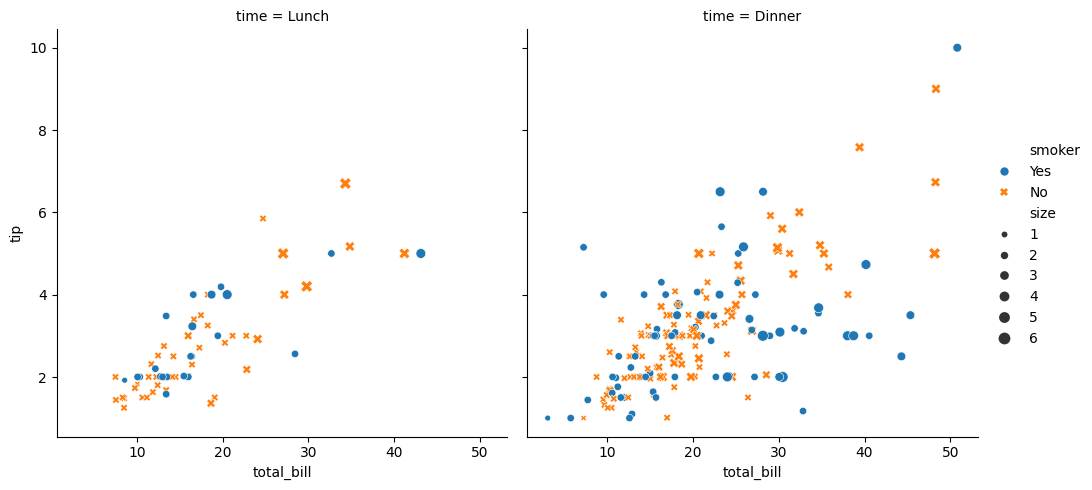

In [115]:
# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [117]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


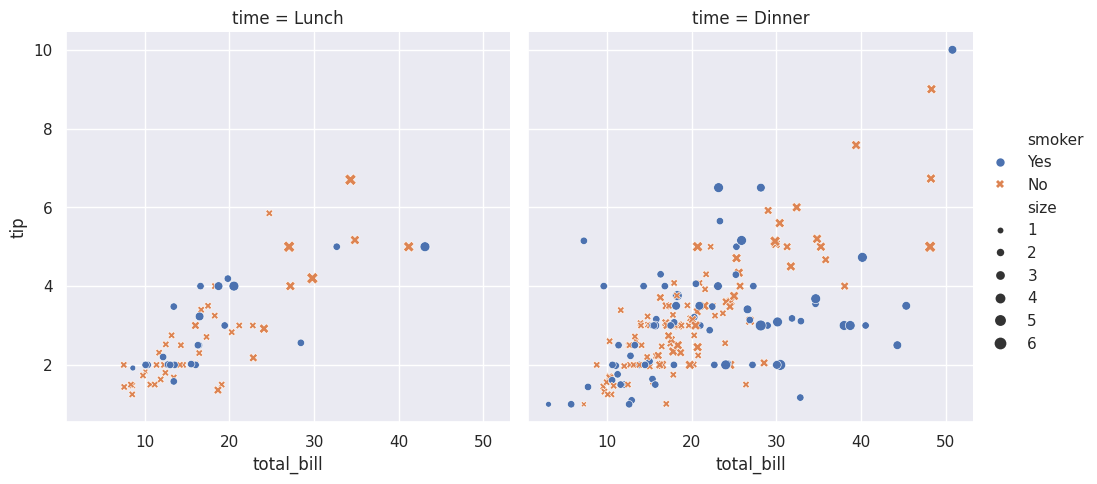

In [116]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)